In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted')

In [ ]:
previous_application = pd.read_csv('/content/drive/MyDrive/Preprocssed datasets/Previous_application_preprocessed_data.csv')
application_train = pd.read_csv('/content/drive/MyDrive/Preprocssed datasets/cleaned_application_train_dataset.csv')
bureau = pd.read_csv('/content/drive/MyDrive/Preprocssed datasets/bureau_cleaned.csv')
bureau_balance = pd.read_csv('/content/drive/MyDrive/Preprocssed datasets/bureau_balance.csv')
pos_cash = pd.read_csv('/content/drive/MyDrive/Preprocssed datasets/POS_CASH_balance_cleaned.csv')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Preprocssed datasets/installments_payments.csv')

# Type classification


In [ ]:
#type classification
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print('-----'*40)
    print("numerical_features:",numerical_features)

In [ ]:
type_features(application_train)

categorical_features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_

In [ ]:
type_features(bureau)

categorical_features : Index(['DAYS_CREDIT'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE'],
      dtype='object')


In [ ]:
type_features(previous_application)

categorical_features : Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYME

In [ ]:
type_features(bureau_balance)

categorical_features : Index(['STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_BUREAU', 'MONTHS_BALANCE'], dtype='object')


In [ ]:
type_features(pos_cash)

categorical_features : Index(['NAME_CONTRACT_STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')


# Merging

In [ ]:
app_train = application_train
bureau = bureau
previous_app =  previous_application
bureau_balance =  bureau_balance

In [ ]:
bureau_merged = bureau.merge(bureau_balance, left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU', how='inner')

# EDA

<ipython-input-14-afa65b92a59c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette='coolwarm')


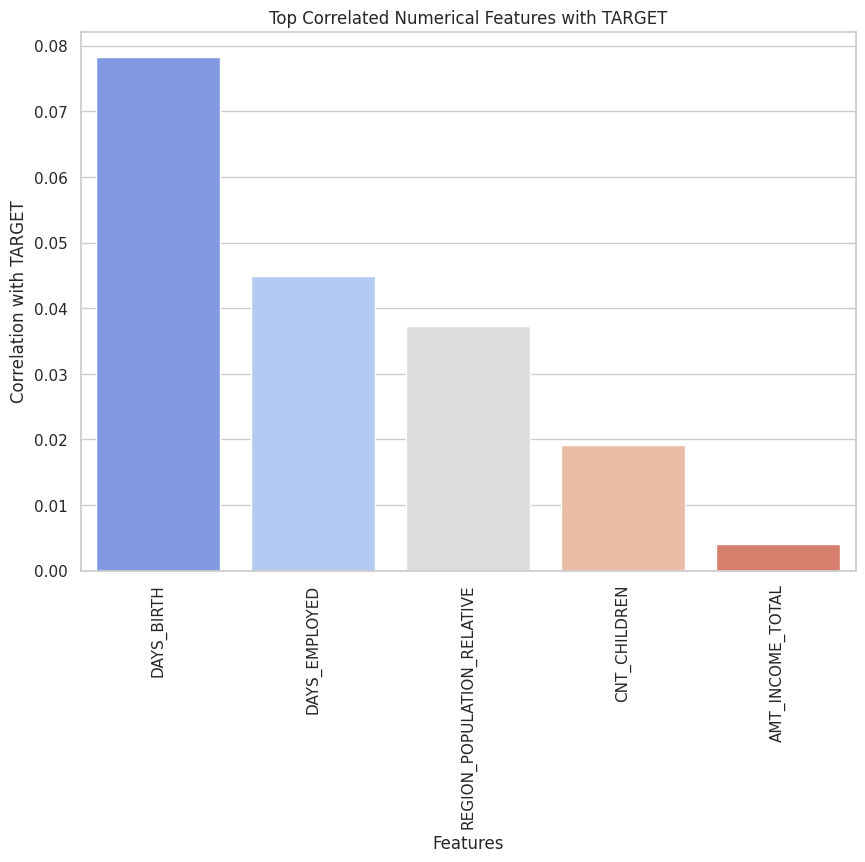

In [ ]:
# Correlations of numerical features with 'TARGET'
numerical_features = [
    'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',
    'DAYS_BIRTH', 'DAYS_EMPLOYED'
]

# Calculate the correlation matrix
corr_matrix = app_train[numerical_features].corr()  # Use 'bureau' instead of 'app_train'
target_corr = corr_matrix['TARGET'].abs().sort_values(ascending=False)[1:]  # Exclude 'TARGET' itself

# Plotting the correlations
plt.figure(figsize=(10, 7))
sns.barplot(x=target_corr.index, y=target_corr.values, palette='coolwarm')
plt.title('Top Correlated Numerical Features with TARGET')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with TARGET')
plt.show()


<ipython-input-15-17c3d5fc532c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
<ipython-input-15-17c3d5fc532c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=bins, labels=labels, right=False)


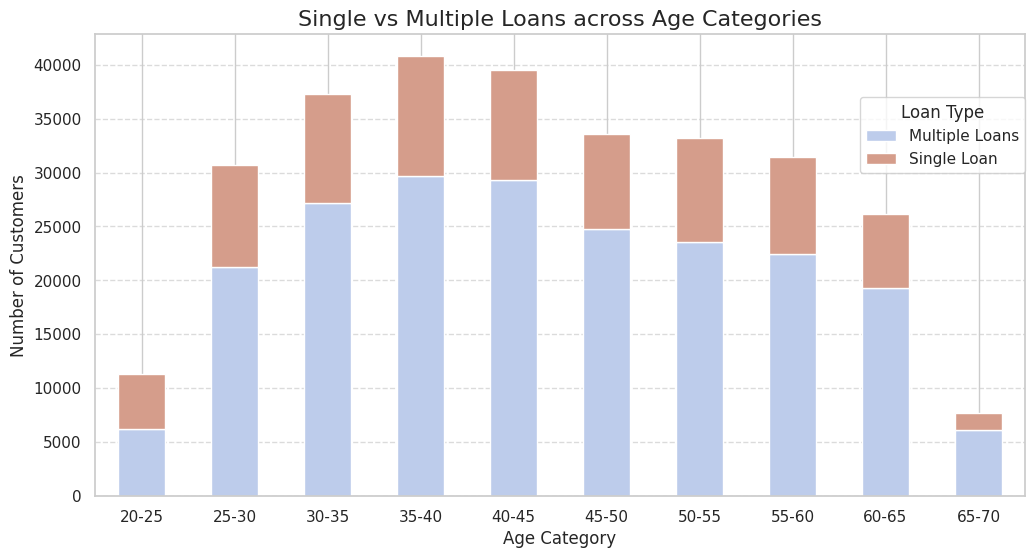

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Ensure positive 'DAYS_BIRTH' and convert to years
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
age_data = application_train[['SK_ID_CURR', 'TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Step 2: Bin 'YEARS_BIRTH' into specific age ranges (e.g., 20-25, 25-30)
bins = np.arange(20, 75, 5)  # Bins: 20-25, 25-30, ..., 70-75
labels = [f"{i}-{i+5}" for i in bins[:-1]]  # Generate labels like "20-25", "25-30"
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=bins, labels=labels, right=False)

# Step 3: Calculate loan counts per customer and label loan types
loan_count_per_customer = data.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()
multi_loan_counts = loan_count_per_customer.apply(lambda x: 'Multiple Loans' if x > 1 else 'Single Loan')

# Step 4: Merge age bins and loan types
age_loan_data = age_data.merge(multi_loan_counts.rename('Loan_Type'), on='SK_ID_CURR')

# Step 5: Create a crosstab to compare loan types across age ranges
age_loan_crosstab = pd.crosstab(age_loan_data['YEARS_BINNED'], age_loan_data['Loan_Type'])

# Step 6: Plot the stacked bar chart with custom colors
fig, ax = plt.subplots(figsize=(12, 6))
age_loan_crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#bdcceb', '#d59d8b'],  # RGB to Hex: (189, 204, 235) and (213, 157, 139)
    ax=ax
)

# Step 7: Add titles and labels
ax.set_title('Single vs Multiple Loans across Age Categories', fontsize=16)
ax.set_xlabel('Age Category', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)

# Step 8: Customize the legend to appear at the lower-right
ax.legend(
    title='Loan Type',
    bbox_to_anchor=(1, 0.7),  # Positioned to lower-right
    loc='lower right',
    borderaxespad=0
)

# Step 9: Customize grid and ticks
plt.xticks(rotation=0)  # Set age category labels horizontally
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()
data['Loan_Type'] = loan_count_per_customer.apply(lambda x: 'Multiple Loans' if x > 1 else 'Single Loan')


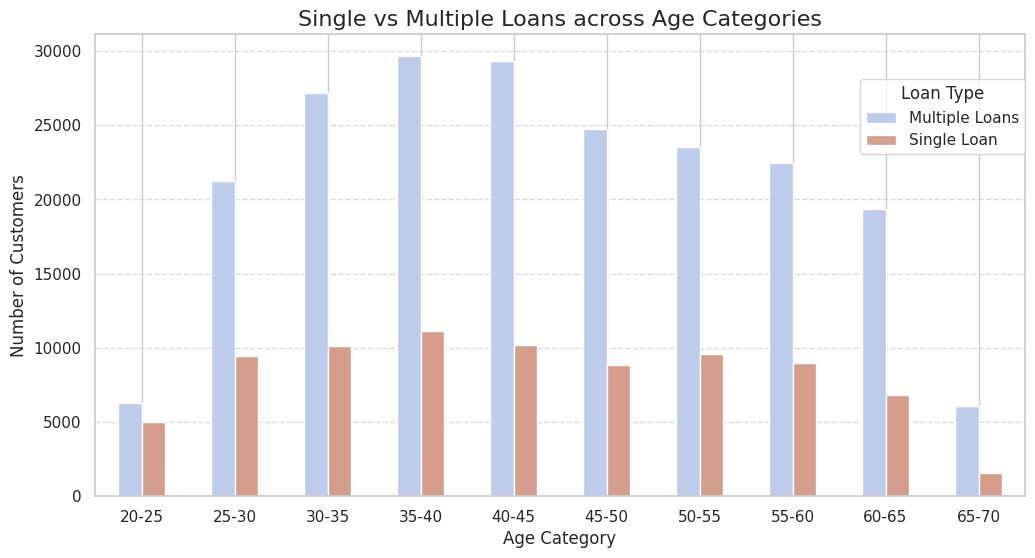

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
age_loan_crosstab.plot(
    kind='bar',
    stacked=False,
    color=['#bdcceb', '#d59d8b'],
    ax=ax
)

ax.set_title('Single vs Multiple Loans across Age Categories', fontsize=16)
ax.set_xlabel('Age Category', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)

# Legend at the lower-right corner
ax.legend(title='Loan Type', bbox_to_anchor=(1, 0.74), loc='lower right', borderaxespad=0)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


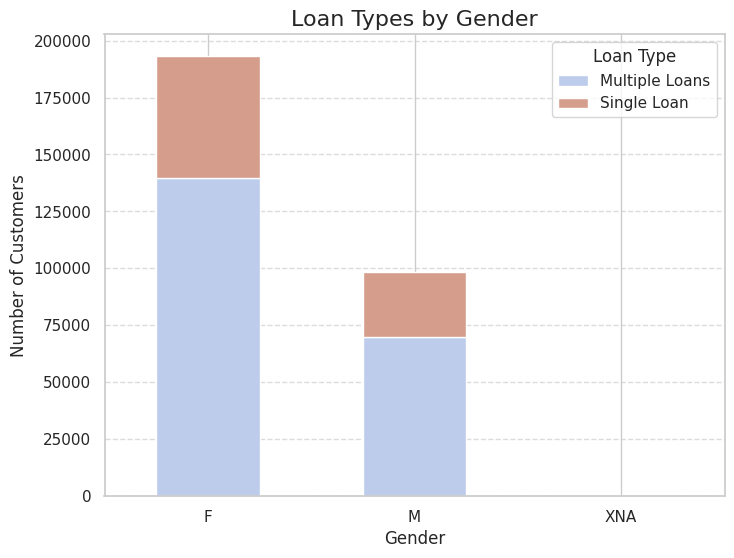

In [ ]:
# Step 1: Extract relevant columns
gender_data = application_train[['SK_ID_CURR', 'CODE_GENDER']]

# Step 2: Calculate loan counts per customer and label loan types
loan_count_per_customer = data.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()
multi_loan_counts = loan_count_per_customer.apply(lambda x: 'Multiple Loans' if x > 1 else 'Single Loan')

# Step 3: Merge gender data with loan type labels
gender_loan_data = gender_data.merge(multi_loan_counts.rename('Loan_Type'), on='SK_ID_CURR')

# Step 4: Create a crosstab to compare loan types by gender
gender_loan_crosstab = pd.crosstab(gender_loan_data['CODE_GENDER'], gender_loan_data['Loan_Type'])


# Stacked Bar Plot
gender_loan_crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color=['#bdcceb', '#d59d8b']
)

plt.title('Loan Types by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Loan Type', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


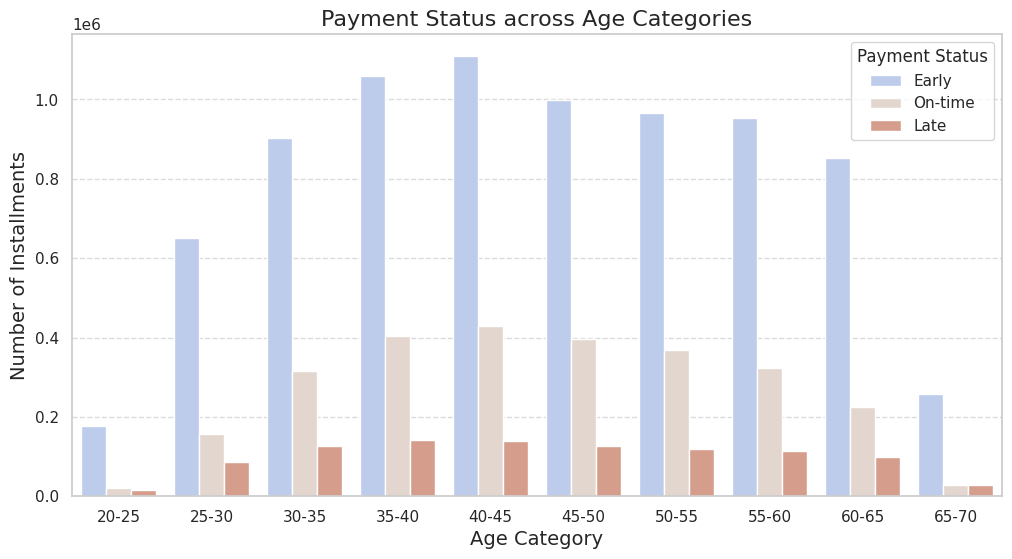

In [ ]:
# Step 1: Ensure positive 'DAYS_BIRTH' and convert to years
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['YEARS_BIRTH'] = application_train['DAYS_BIRTH'] / 365

# Step 2: Create age categories (bins)
age_bins = np.linspace(20, 70, num=11)  # 11 edges, creating 10 bins
age_labels = [f'{int(age_bins[i])}-{int(age_bins[i+1])}' for i in range(len(age_bins)-1)]  # 10 labels

application_train['AGE_CATEGORY'] = pd.cut(
    application_train['YEARS_BIRTH'],
    bins=age_bins,
    labels=age_labels,
    right=False  # Include the left edge, exclude the right edge
)

# Step 3: Merge age categories into the payment data using 'SK_ID_CURR'
data = data.merge(application_train[['SK_ID_CURR', 'AGE_CATEGORY']], on='SK_ID_CURR', how='left')

# Step 4: Create 'payment_status' based on comparison of payment and instalment day
def determine_payment_status(row):
    if row['DAYS_ENTRY_PAYMENT'] < row['DAYS_INSTALMENT']:
        return 'Early'
    elif row['DAYS_ENTRY_PAYMENT'] == row['DAYS_INSTALMENT']:
        return 'On-time'
    else:
        return 'Late'

# Step 5: Apply the function to create the new column
data['payment_status'] = data.apply(determine_payment_status, axis=1)

# Verify that 'AGE_CATEGORY' and 'payment_status' are in the DataFrame

# Step 6: Plot the relationship between payment status and age category
plt.figure(figsize=(12, 6))
custom_palette = ['#B5CAF3', '#E6D5CC', '#E1967F']  # Custom RGB colors in hex

sns.countplot(x='AGE_CATEGORY', hue='payment_status', data=data, palette=custom_palette)

# Add title and axis labels
plt.title('Payment Status across Age Categories', fontsize=16)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Number of Installments', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Payment Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<Figure size 1500x1000 with 0 Axes>

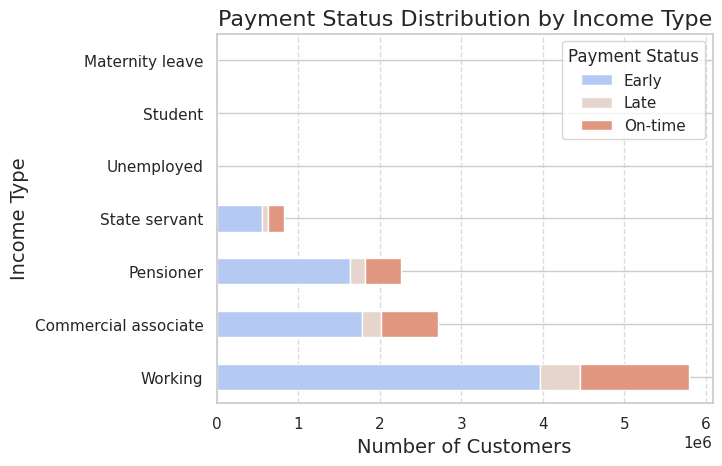

In [ ]:
data = data.merge(application_train[['SK_ID_CURR', 'NAME_INCOME_TYPE']], on='SK_ID_CURR', how='left')

# Step 1: Create a crosstab of income type and payment status
income_payment_crosstab = pd.crosstab(data['NAME_INCOME_TYPE'], data['payment_status'])

# Step 2: Sort the crosstab in ascending order based on total counts of 'On-time' payments
income_payment_crosstab = income_payment_crosstab.sort_values(by='On-time', ascending=False)

# Step 3: Plot the horizontal stacked bar chart
plt.figure(figsize=(15, 10))
income_payment_crosstab.plot(kind='barh', stacked=True, color=['#B5CAF3', '#E6D5CC', '#E1967F'])  # Custom colors

# Step 4: Add title and axis labels
plt.title('Payment Status Distribution by Income Type', fontsize=16)
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Income Type', fontsize=14)
plt.legend(title='Payment Status', loc='upper right')  # Position legend at upper right

# Optional: Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


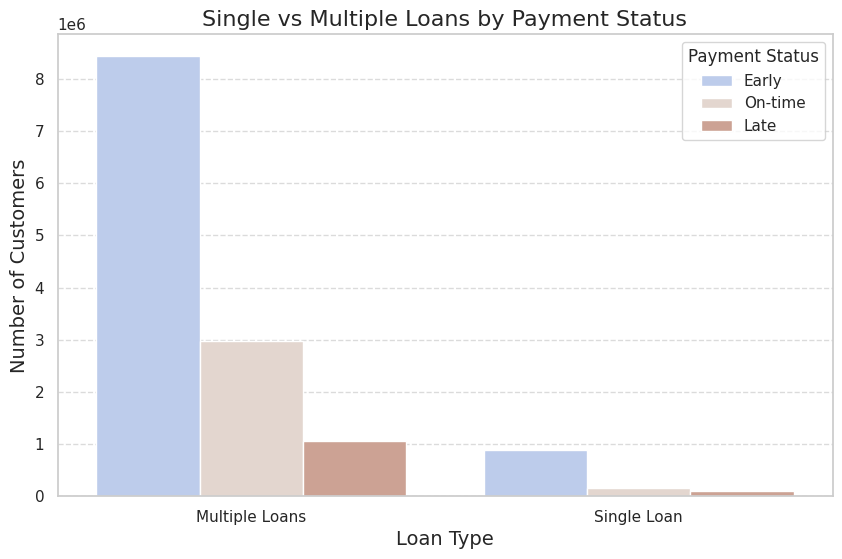

In [ ]:
# Assuming 'data' DataFrame has been previously defined and contains 'SK_ID_CURR' and 'SK_ID_PREV' columns

# Step 1: Calculate loan counts per customer
loan_count_per_customer = data.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()

# Step 2: Create a mapping from SK_ID_CURR to Loan_Type
loan_type_mapping = loan_count_per_customer.apply(lambda x: 'Multiple Loans' if x > 1 else 'Single Loan')

# Step 3: Map Loan_Type back to the data DataFrame
data['Loan_Type'] = data['SK_ID_CURR'].map(loan_type_mapping)

# Step 4: Create the count plot
plt.figure(figsize=(10, 6))
custom_palette = ['#B5CAF3', '#E6D5CC' , '#D59D8B']  # Custom RGB colors in hex

sns.countplot(x='Loan_Type', hue='payment_status', data=data, palette=custom_palette)

# Step 5: Add title and axis labels
plt.title('Single vs Multiple Loans by Payment Status', fontsize=16)
plt.xlabel('Loan Type', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend(title='Payment Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Feature Eng

**YEARS_BIRTH:** Derived from DAYS_BIRTH to represent the age of the customer in years.

**YEARS_BINNED:**Binned version of YEARS_BIRTH, categorizing the age into ranges like 20-25, 25-30, etc.

**Loan Type (Loan_Type):**

Single Loan: If the customer has only one loan.

Multiple Loans: If the customer has more than one loan.

In [ ]:
# Ensure positive 'DAYS_BIRTH' and convert to years
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
age_data = application_train[['SK_ID_CURR', 'TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin 'YEARS_BIRTH' into age ranges (e.g., 20-25, 25-30, ...)
bins = np.arange(20, 75, 5)
labels = [f"{i}-{i+5}" for i in bins[:-1]]
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=bins, labels=labels, right=False)

# Calculate loan counts per customer and label loan types
loan_count_per_customer = data.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()
multi_loan_counts = loan_count_per_customer.apply(lambda x: 'Multiple Loans' if x > 1 else 'Single Loan')


# Merge age bins and loan types into a single DataFrame
age_loan_data = age_data.merge(multi_loan_counts.rename('Loan_Type'), on='SK_ID_CURR')
# Merge Loan_Type into the original data DataFrame
data = data.merge(age_loan_data[['SK_ID_CURR', 'Loan_Type']], on='SK_ID_CURR', how='left')

# Create a crosstab comparing loan types across age categories
age_loan_crosstab = pd.crosstab(age_loan_data['YEARS_BINNED'], age_loan_data['Loan_Type'])

# Print the crosstab
print(age_loan_crosstab)

<ipython-input-21-6e4efd69a4d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
<ipython-input-21-6e4efd69a4d6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=bins, labels=labels, right=False)


Loan_Type     Multiple Loans  Single Loan
YEARS_BINNED                             
20-25                   6272         5016
25-30                  21220         9451
30-35                  27157        10151
35-40                  29650        11123
40-45                  29321        10210
45-50                  24738         8825
50-55                  23545         9616
55-60                  22474         8983
60-65                  19335         6842
65-70                   6114         1600


**AGE_CATEGORY:** Categorizes age into defined bins (e.g., '20-25', '25-30', ..., '65-70').

**payment_status:** Indicates whether the payment was **'Early'**, **'On-time',** or **'Late'** based on a comparison of DAYS_ENTRY_PAYMENT and DAYS_INSTALMENT.

In [ ]:
# Step 1: Ensure positive 'DAYS_BIRTH' and convert to years
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['YEARS_BIRTH'] = application_train['DAYS_BIRTH'] / 365

# Step 2: Create age categories (bins)
age_bins = np.linspace(20, 70, num=11)  # 11 edges, creating 10 bins
age_labels = [f'{int(age_bins[i])}-{int(age_bins[i+1])}' for i in range(len(age_bins)-1)]  # 10 labels

application_train['AGE_CATEGORY'] = pd.cut(
    application_train['YEARS_BIRTH'],
    bins=age_bins,
    labels=age_labels,
    right=False  # Include the left edge, exclude the right edge
)

# Step 3: Merge age categories into the payment data using 'SK_ID_CURR'
data = data.merge(application_train[['SK_ID_CURR', 'AGE_CATEGORY']], on='SK_ID_CURR', how='left')

# Step 4: Create 'payment_status' based on comparison of payment and instalment day
def determine_payment_status(row):
    if row['DAYS_ENTRY_PAYMENT'] < row['DAYS_INSTALMENT']:
        return 'Early'
    elif row['DAYS_ENTRY_PAYMENT'] == row['DAYS_INSTALMENT']:
        return 'On-time'
    else:
        return 'Late'

# Step 5: Apply the function to create the new column
data['payment_status'] = data.apply(determine_payment_status, axis=1)

# Print the output
print(data[['SK_ID_CURR', 'AGE_CATEGORY', 'payment_status']].head())

   SK_ID_CURR AGE_CATEGORY payment_status
0      161674        65-70          Early
1      151639        45-50        On-time
2      193053        50-55        On-time
3      199697        25-30          Early
4      167756        40-45           Late


**Gender (CODE_GENDER): Categories:** 'M', 'F', and 'Others' (renamed from 'XNA').



In [ ]:
# Step 1: Calculate loan counts per customer and label loan types
loan_count_per_customer = data.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()
data['Loan_Type'] = loan_count_per_customer.apply(lambda x: 'Multiple Loans' if x > 1 else 'Single Loan')

# Step 2: Extract gender information from application_train
gender_data = application_train[['SK_ID_CURR', 'CODE_GENDER']]
gender_data['CODE_GENDER'] = gender_data['CODE_GENDER'].replace('XNA', 'Others')

# Step 3: Merge 'Loan_Type' into gender_data based on 'SK_ID_CURR'
gender_loan_data = gender_data.merge(data[['SK_ID_CURR', 'Loan_Type']], on='SK_ID_CURR', how='inner')

# Step 4: Display the merged DataFrame
print(gender_loan_data.head())

<ipython-input-24-99bde4fb692b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data['CODE_GENDER'] = gender_data['CODE_GENDER'].replace('XNA', 'Others')


   SK_ID_CURR CODE_GENDER       Loan_Type
0      100002           M  Multiple Loans
1      100002           M  Multiple Loans
2      100002           M  Multiple Loans
3      100002           M             NaN
4      100002           M             NaN


<Figure size 1500x1000 with 0 Axes>

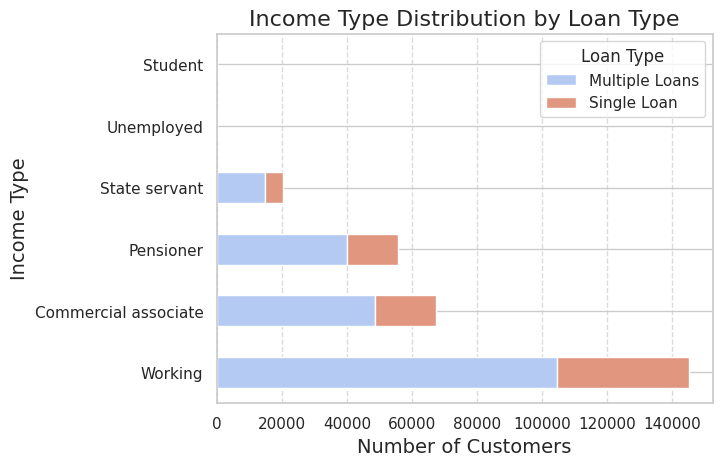

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = data.merge(application_train[['SK_ID_CURR', 'NAME_INCOME_TYPE']], on='SK_ID_CURR', how='left')

# Step 1: Create a crosstab of income type and loan type
income_loan_crosstab = pd.crosstab(data['NAME_INCOME_TYPE'], data['Loan_Type'])

# Step 2: Sort the crosstab in ascending order based on the total counts of 'Single Loan'
income_loan_crosstab = income_loan_crosstab.sort_values(by='Single Loan', ascending=False)

# Step 3: Plot the horizontal stacked bar chart
plt.figure(figsize=(15, 10))
income_loan_crosstab.plot(kind='barh', stacked=True, color=['#B5CAF3', '#E1967F'])  # Custom colors

# Step 4: Add title and axis labels
plt.title('Income Type Distribution by Loan Type', fontsize=16)
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Income Type', fontsize=14)
plt.legend(title='Loan Type', loc='upper right')  # Position legend at upper right

# Optional: Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

**income_loan_crosstab:** A cross-tabulation that summarizes the distribution of income types against loan types, allowing you to analyze how different income types relate to single or multiple loans.

In [ ]:
data = data.merge(application_train[['SK_ID_CURR', 'NAME_INCOME_TYPE']], on='SK_ID_CURR', how='left', suffixes=('_existing', '_new'))

# Step 1: Create a crosstab of income type and loan type
income_loan_crosstab = pd.crosstab(data['NAME_INCOME_TYPE'], data['Loan_Type'])

# Step 2: Sort the crosstab in ascending order based on the total counts of 'Single Loan'
income_loan_crosstab = income_loan_crosstab.sort_values(by='Single Loan', ascending=False)

In [ ]:
print(income_loan_crosstab)

Loan_Type             Multiple Loans  Single Loan
NAME_INCOME_TYPE                                 
Working                       104688        40426
Commercial associate           48504        18937
Pensioner                      40183        15616
State servant                  14909         5553
Unemployed                        32           12
Student                            4            5


**payment_status:** This categorical feature indicates the status of payments, which could be categorized as:

  **Early:** Payments made before the due date.

  **On-time:** Payments made on the due date.

  **Late:** Payments made after the due date.

  **The crosstabulation** (income_payment_crosstab) will provide a summary of how different income types relate to various payment statuses.

In [ ]:
# Step 1: Create a crosstab of income type and payment status
income_payment_crosstab = pd.crosstab(data['NAME_INCOME_TYPE'], data['payment_status'])

# Step 2: Sort the crosstab in ascending order based on total counts of 'On-time' payments
income_payment_crosstab = income_payment_crosstab.sort_values(by='On-time', ascending=False)


In [ ]:
print(income_payment_crosstab)

payment_status          Early    Late  On-time
NAME_INCOME_TYPE                              
Working               3959560  499181  1334153
Commercial associate  1778437  234419   704843
Pensioner             1631504  191886   432510
State servant          556723   70205   196576
Unemployed                554     412      139
Student                   235      35       39
Maternity leave           100      74        7


**Payment_Count:** The total number of payments made by each customer, aggregated by their unique identifier (SK_ID_CURR).

In [ ]:
# Count the number of payments made by each customer
data['Payment_Count'] = data.groupby('SK_ID_CURR')['AMT_PAYMENT'].transform('count')

print(data[['SK_ID_CURR', 'Payment_Count']].drop_duplicates().reset_index(drop=True))

        SK_ID_CURR  Payment_Count
0           161674            101
1           151639            158
2           193053              3
3           199697             27
4           167756             30
...            ...            ...
339582      427056              2
339583      434108              1
339584      413433              1
339585      434445              1
339586      405063              0

[339587 rows x 2 columns]


**Total_Amount_Paid:** The sum of all payments made by each customer, aggregated by their unique identifier (SK_ID_CURR).

In [ ]:
# Calculate the total amount paid by each customer
data['Total_Amount_Paid'] = data.groupby('SK_ID_CURR')['AMT_PAYMENT'].transform('sum')

print(data[['SK_ID_CURR', 'Total_Amount_Paid']].drop_duplicates().reset_index(drop=True))

        SK_ID_CURR  Total_Amount_Paid
0           161674        1272601.395
1           151639        1459989.270
2           193053          34449.210
3           199697         402574.230
4           167756         104761.845
...            ...                ...
339582      427056          13965.615
339583      434108          28975.770
339584      413433         656487.945
339585      434445          55493.055
339586      405063              0.000

[339587 rows x 2 columns]


**Average_Payment_Delay:** The mean of payment delays for each customer, calculated using the DAYS_ENTRY_PAYMENT column, which presumably represents the number of days between the payment due date and the actual payment date.

In [ ]:
# Calculate the average payment delay
data['Average_Payment_Delay'] = data.groupby('SK_ID_CURR')['DAYS_ENTRY_PAYMENT'].transform('mean')

print(data[['SK_ID_CURR', 'Average_Payment_Delay']].drop_duplicates().reset_index(drop=True))

        SK_ID_CURR  Average_Payment_Delay
0           161674           -1037.544554
1           151639           -1330.822785
2           193053             -35.000000
3           199697           -1116.370370
4           167756           -1198.400000
...            ...                    ...
339582      427056           -2898.000000
339583      434108            -840.000000
339584      413433            -614.000000
339585      434445            -326.000000
339586      405063                    NaN

[339587 rows x 2 columns]


In [ ]:
summary_features = data[['SK_ID_CURR', 'AGE_CATEGORY', 'payment_status', 'Loan_Type',
                         'Payment_Count', 'Total_Amount_Paid', 'Average_Payment_Delay']].drop_duplicates()


In [ ]:
summary_features.head()

,SK_ID_CURR,AGE_CATEGORY,payment_status,Loan_Type,Payment_Count,Total_Amount_Paid,Average_Payment_Delay
0,161674,65-70,Early,NaN,101,1272601.395,-1037.544554
1,151639,45-50,On-time,NaN,158,1459989.270,-1330.822785
2,193053,50-55,On-time,NaN,3,34449.210,-35.000000
3,199697,25-30,Early,NaN,27,402574.230,-1116.370370
4,167756,40-45,Late,NaN,30,104761.845,-1198.400000


## Random Forest and Decision Tree Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import joblib

# Assuming application_train and summary_features data are loaded
# Merge summary_features with application_train on SK_ID_CURR
merged_data = pd.merge(application_train, summary_features, on='SK_ID_CURR', how='left')

# Rename columns to match the available ones
merged_data.rename(columns={'AGE_CATEGORY_x': 'AGE_CATEGORY'}, inplace=True)

# Select features for training (including application_train columns as needed)
X = merged_data[['AGE_CATEGORY', 'Loan_Type', 'Payment_Count', 'Total_Amount_Paid', 'Average_Payment_Delay',
                 'AMT_INCOME_TOTAL', 'AMT_CREDIT']]
y = merged_data['TARGET']  # Assuming 'TARGET' column in application_train represents the loan payment status

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Impute Missing Values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions with the Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy * 100))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy * 100))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Save the models to .pkl files
#joblib.dump(dt_model, 'decision_tree_model.pkl')
#print("Decision Tree model saved as decision_tree_model.pkl")

#joblib.dump(rf_model, 'random_forest_model.pkl')
#print("Random Forest model saved as random_forest_model.pkl")

# Save the column names used for training
joblib.dump(X.columns, 'training_columns.pkl')
print("Training columns saved as training_columns.pkl")


Decision Tree Accuracy: 97.30%
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    140058
           1       0.82      0.87      0.84     12802

    accuracy                           0.97    152860
   macro avg       0.90      0.93      0.91    152860
weighted avg       0.97      0.97      0.97    152860

Random Forest Accuracy: 98.39%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    140058
           1       0.99      0.81      0.89     12802

    accuracy                           0.98    152860
   macro avg       0.99      0.91      0.94    152860
weighted avg       0.98      0.98      0.98    152860

Training columns saved as training_columns.pkl


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
